In [2]:
from ncbi_genome import NCBIGenome
from covid19_genome import Covid19Genome

2023-11-27 11:21:45.783206: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-27 11:21:45.850890: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 11:21:47.184849: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
ncbi_genome = NCBIGenome()

## Extract the taxa names from the file
with open("pathogenic-bacteria-taxa.txt", "r") as f:
    taxa = [line.strip() for line in f]

## Download the accessions
ncbi_genome.downloadAccessions(taxa, 100)

In [3]:
covid19_genome = Covid19Genome()
# covid19_genome.downloadLineages(accs_thresh = 256, max_accs = 256)

Building Data frame
Done building Data frame
Building remote dicts
Done building remote dicts
Building local dicts
Done building local dicts


In [9]:
import datetime

def transform_into_date(date_str):
    try:
        if int(date_str[:4]) < 2019:
            return None
        return datetime.datetime(int(date_str[:4]), int(date_str[4:6]), int(date_str[6:8]))
    except:
        return None

df = covid19_genome.df[["acc", "lineage", "collection_date"]]
# Iterate over the data frame and save in a dict as a keys the lineages and as value the earliest collection date
lineage_dict = {}
for index, row in df.iterrows():
    if index % 1000 == 0:
        print(index)
    if len(str(row["collection_date"])) != 8:
        continue
    new_date = transform_into_date(str(row["collection_date"]))
    if new_date is None:
        continue
    if row["lineage"] not in lineage_dict:
        lineage_dict[row["lineage"]] = new_date
    else:
        if new_date < lineage_dict[row["lineage"]]:
            lineage_dict[row["lineage"]] = new_date

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
18000
19000
20000
21000
22000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
159000
160000
161000
162000
163000
164000


In [19]:
local_lineages = covid19_genome.getLocalLineages(1024)
#  Sort the local lineages by the earliest collection date
sorted_lineages = sorted(local_lineages, key=lambda x: lineage_dict[x])


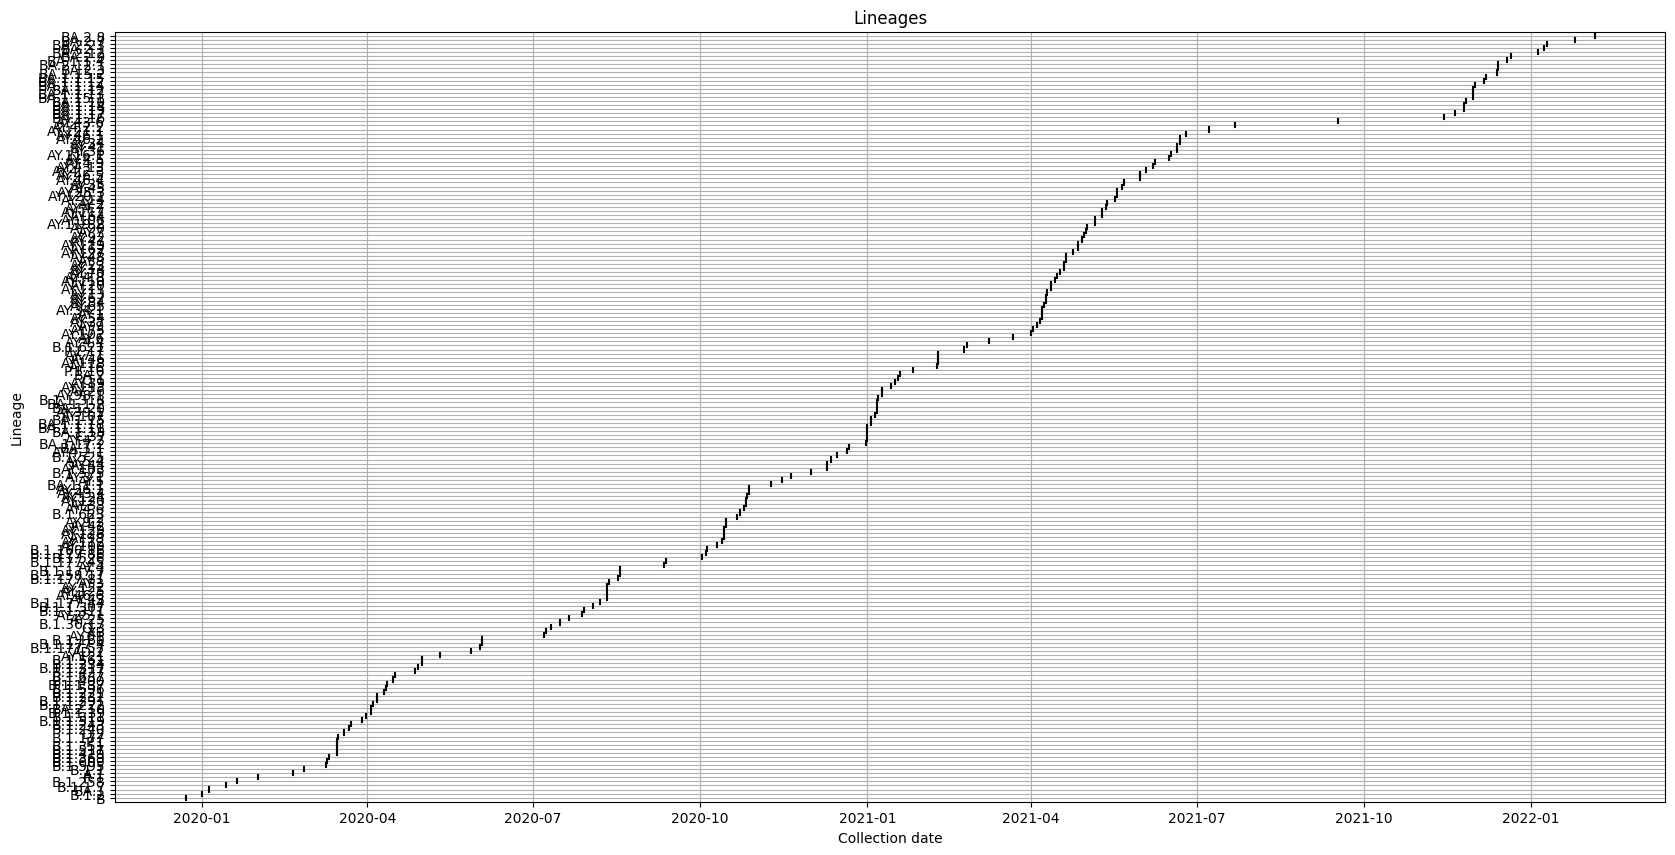

In [20]:
# Plot the lineages
import matplotlib.pyplot as plt
import numpy as np
# sorted_lineages = sorted_lineages[-50:]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Lineages")
ax.set_xlabel("Collection date")
ax.set_ylabel("Lineage")
ax.set_yticks(np.arange(len(sorted_lineages)))
ax.set_yticklabels(sorted_lineages)
ax.set_ylim(-1, len(sorted_lineages))
ax.grid(True)
for index, lineage in enumerate(sorted_lineages):
    if lineage_dict[lineage] is None:
        continue
    ax.plot([lineage_dict[lineage], lineage_dict[lineage]], [index - 0.5, index + 0.5], color="black")
plt.show()


In [23]:
# for example, if we have the lineage B.1.1.7. Its relatives will be B.1.1 (his father) and B.1.1.* (where * means just a number, and those are his brothers)
def get_relatives(lineage, lineages):
    lineage_father = ".".join(lineage.split(".")[:-1])
    depth = len(lineage.split("."))
    relatives = []
    for l in lineages:
        if l == lineage:
            continue
        if l == lineage_father:
            relatives.append(l)
            continue
        if l.startswith(lineage_father + ".") and len(l.split(".")) == depth:
            relatives.append(l)
    return relatives

In [24]:
get_relatives("B.1.1.7", sorted_lineages)

['B.1.1',
 'B.1.1.519',
 'B.1.1.39',
 'B.1.1.222',
 'B.1.1.291',
 'B.1.1.37',
 'B.1.1.317',
 'B.1.1.311',
 'B.1.1.307',
 'B.1.1.318']